In [1]:
# import import_ipynb
# from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

# with the new api
from importnb import imports
with imports("ipynb"):
    from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_14D6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_48C6    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,
2023-11-06 00:00:30-05:00,7.0,7.0,NaN,8.0,2.0,8.0,4.0,8.0,9.0
2023-11-06 00:01:00-05:00,6.0,6.0,NaN,8.0,1.0,9.0,6.0,8.0,9.0
2023-11-06 00:01:30-05:00,6.0,5.0,13.0,9.0,1.0,9.0,7.0,7.0,11.0
2023-11-06 00:02:00-05:00,6.0,5.0,11.0,8.0,1.0,8.0,7.0,8.0,11.0
2023-11-06 00:02:30-05:00,7.0,4.0,12.0,9.0,1.0,9.0,5.0,7.0,10.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE
count,2685.000000,2387.000000,2585.000000,2424.000000,2561.000000,2692.000000,2563.000000,2693.000000,1956.000000
mean,10.315829,5.939673,7.379884,6.752063,7.071847,8.071322,6.003121,8.282213,10.328732
std,6.415337,2.439658,4.020504,2.639425,3.609383,3.587848,3.052748,4.623392,4.192163
min,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,4.000000
25%,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,7.000000
50%,8.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,7.000000,10.000000
75%,16.000000,7.000000,9.000000,8.000000,9.000000,11.000000,8.000000,12.000000,13.000000
max,32.000000,14.000000,17.000000,15.000000,17.000000,20.000000,14.000000,22.000000,24.000000


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,
2023-11-06 00:00:30-05:00,30.0,30.0,NaN,34.0,9.0,34.0,17.0,34.0,38.0
2023-11-06 00:01:00-05:00,25.0,25.0,NaN,34.0,5.0,38.0,25.0,34.0,38.0
2023-11-06 00:01:30-05:00,25.0,21.0,53.0,38.0,5.0,38.0,30.0,30.0,46.0
2023-11-06 00:02:00-05:00,25.0,21.0,46.0,34.0,5.0,34.0,30.0,34.0,46.0
2023-11-06 00:02:30-05:00,30.0,17.0,50.0,38.0,5.0,38.0,21.0,30.0,42.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_48C6,TANGARA_F1AE,TANGARA_06BE
count,2685.000000,2387.000000,2585.000000,2424.000000,2561.000000,2692.000000,2563.000000,2693.000000,1956.000000
mean,39.373184,25.105153,30.282012,28.356436,29.339321,33.371842,25.291065,33.506870,41.398773
std,20.244575,10.012160,15.130513,10.620145,13.941873,13.744967,12.378604,16.805207,14.345017
min,13.000000,5.000000,5.000000,9.000000,0.000000,0.000000,0.000000,9.000000,17.000000
25%,21.000000,17.000000,21.000000,21.000000,21.000000,21.000000,17.000000,21.000000,30.000000
50%,34.000000,25.000000,25.000000,25.000000,25.000000,30.000000,25.000000,30.000000,42.000000
75%,60.000000,30.000000,38.000000,34.000000,38.000000,46.000000,34.000000,50.000000,53.000000
max,93.000000,55.000000,62.000000,58.000000,62.000000,68.000000,55.000000,72.000000,77.000000


## Histograms

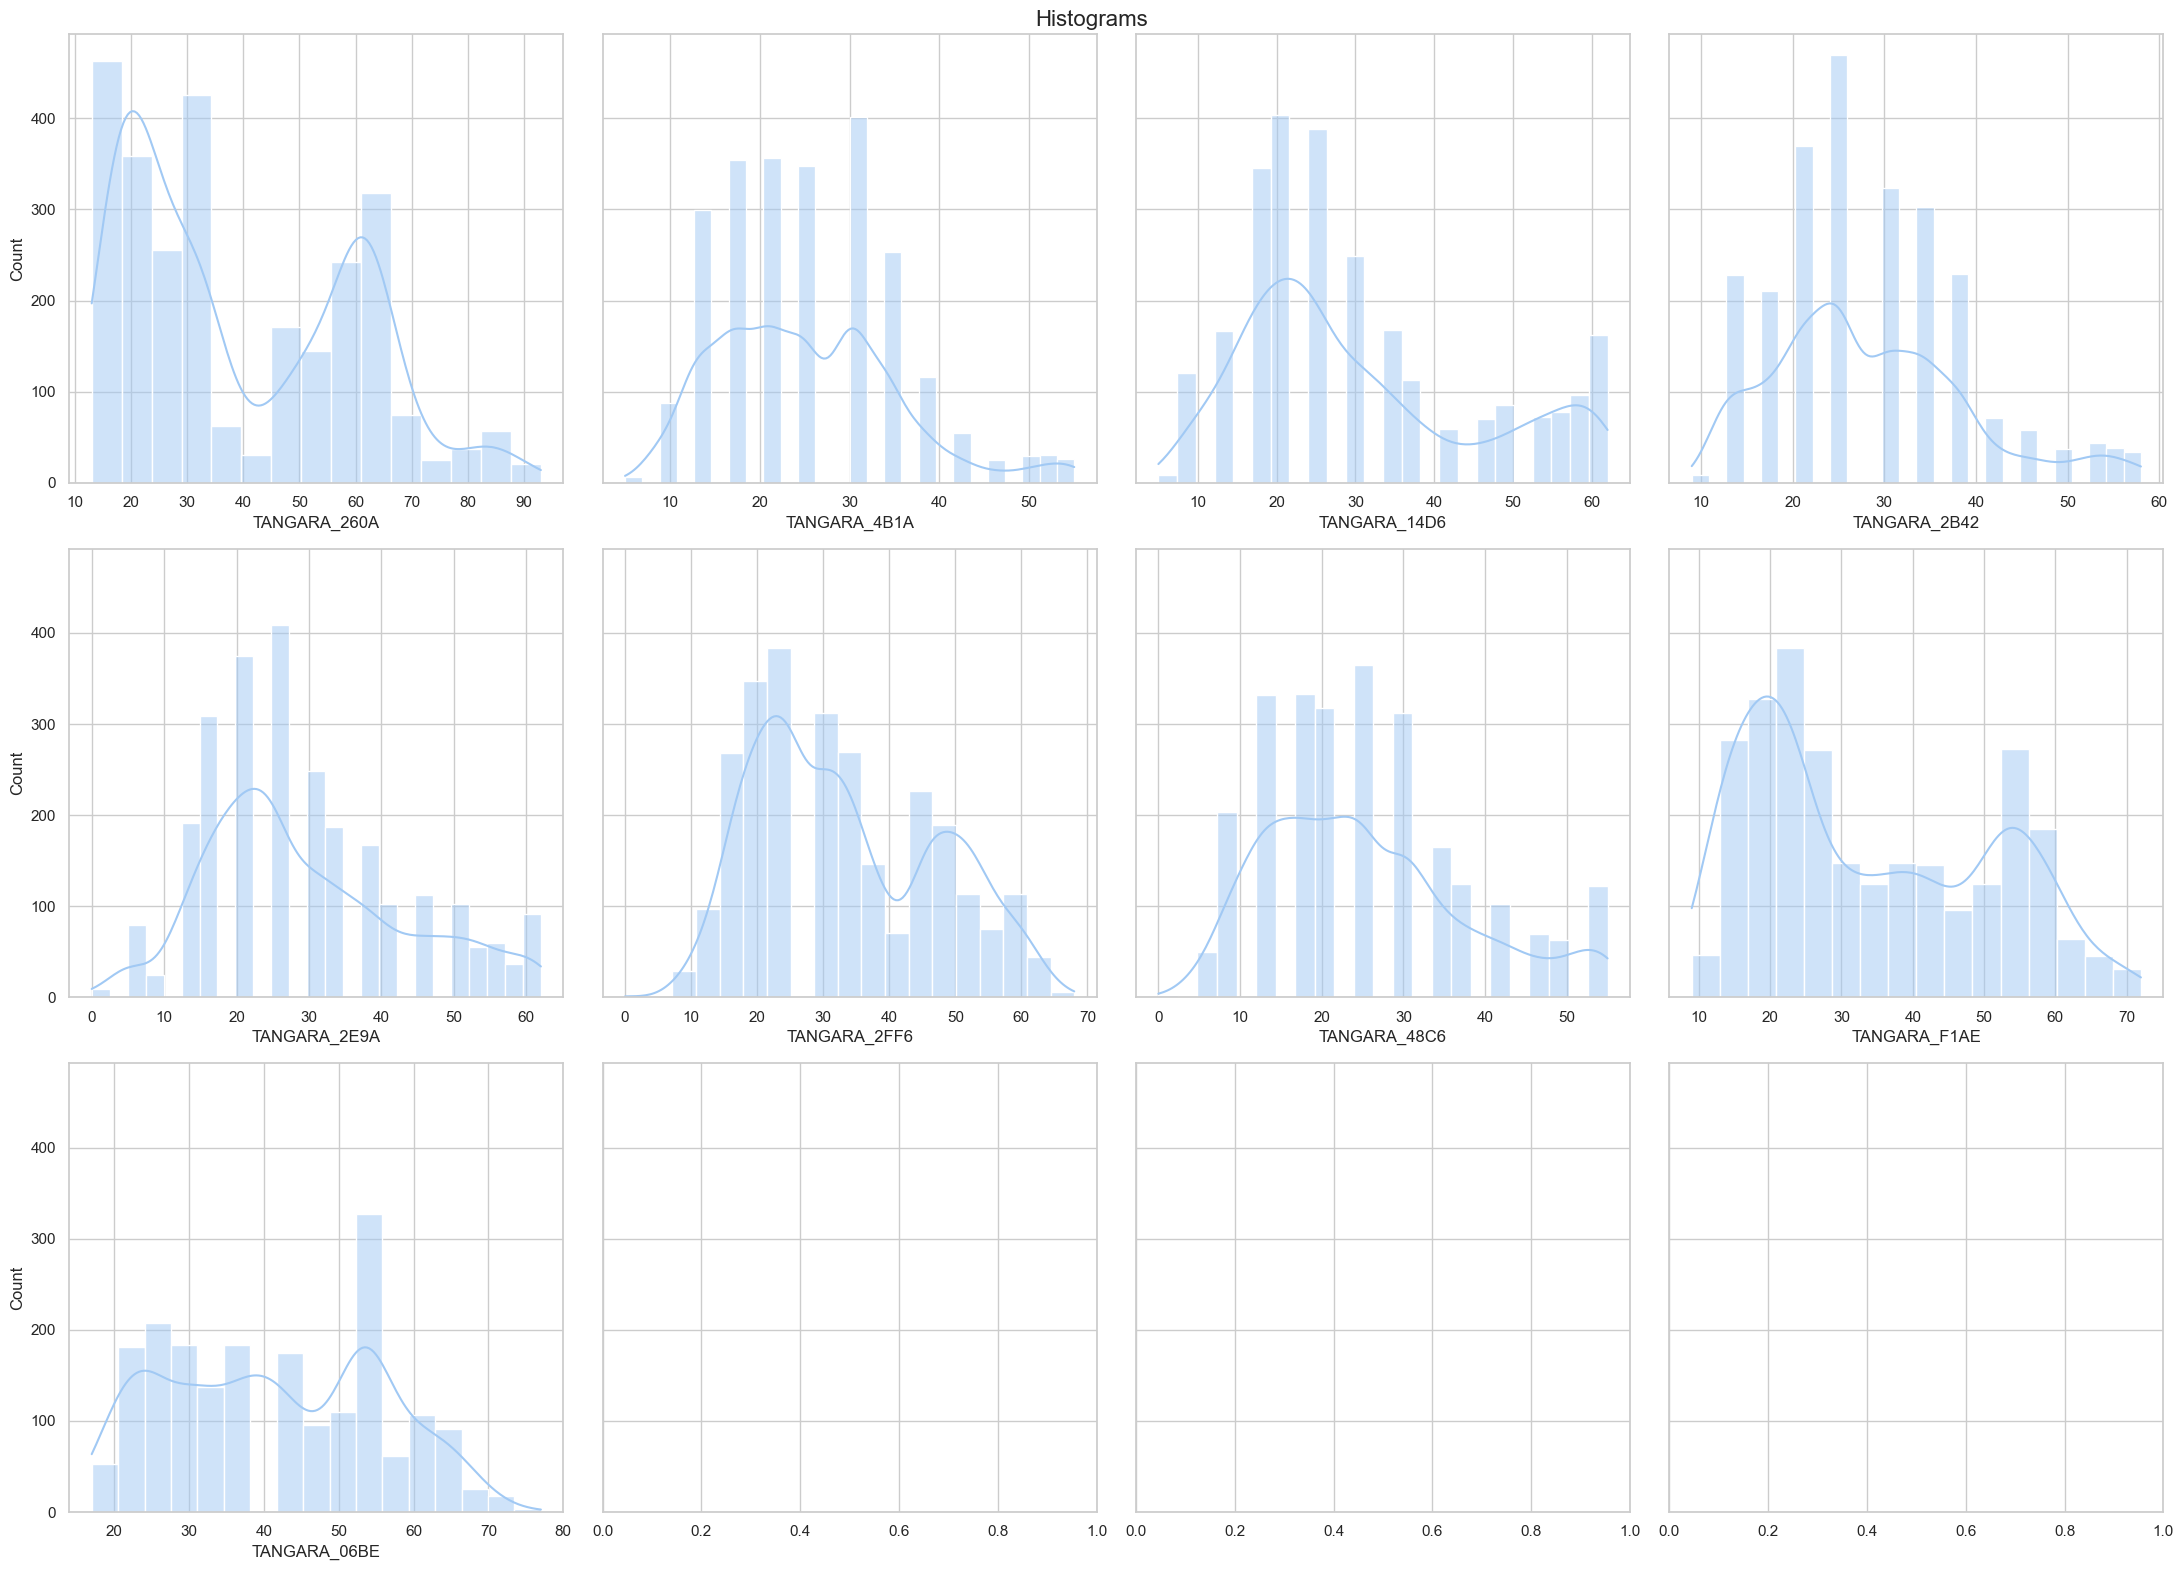

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

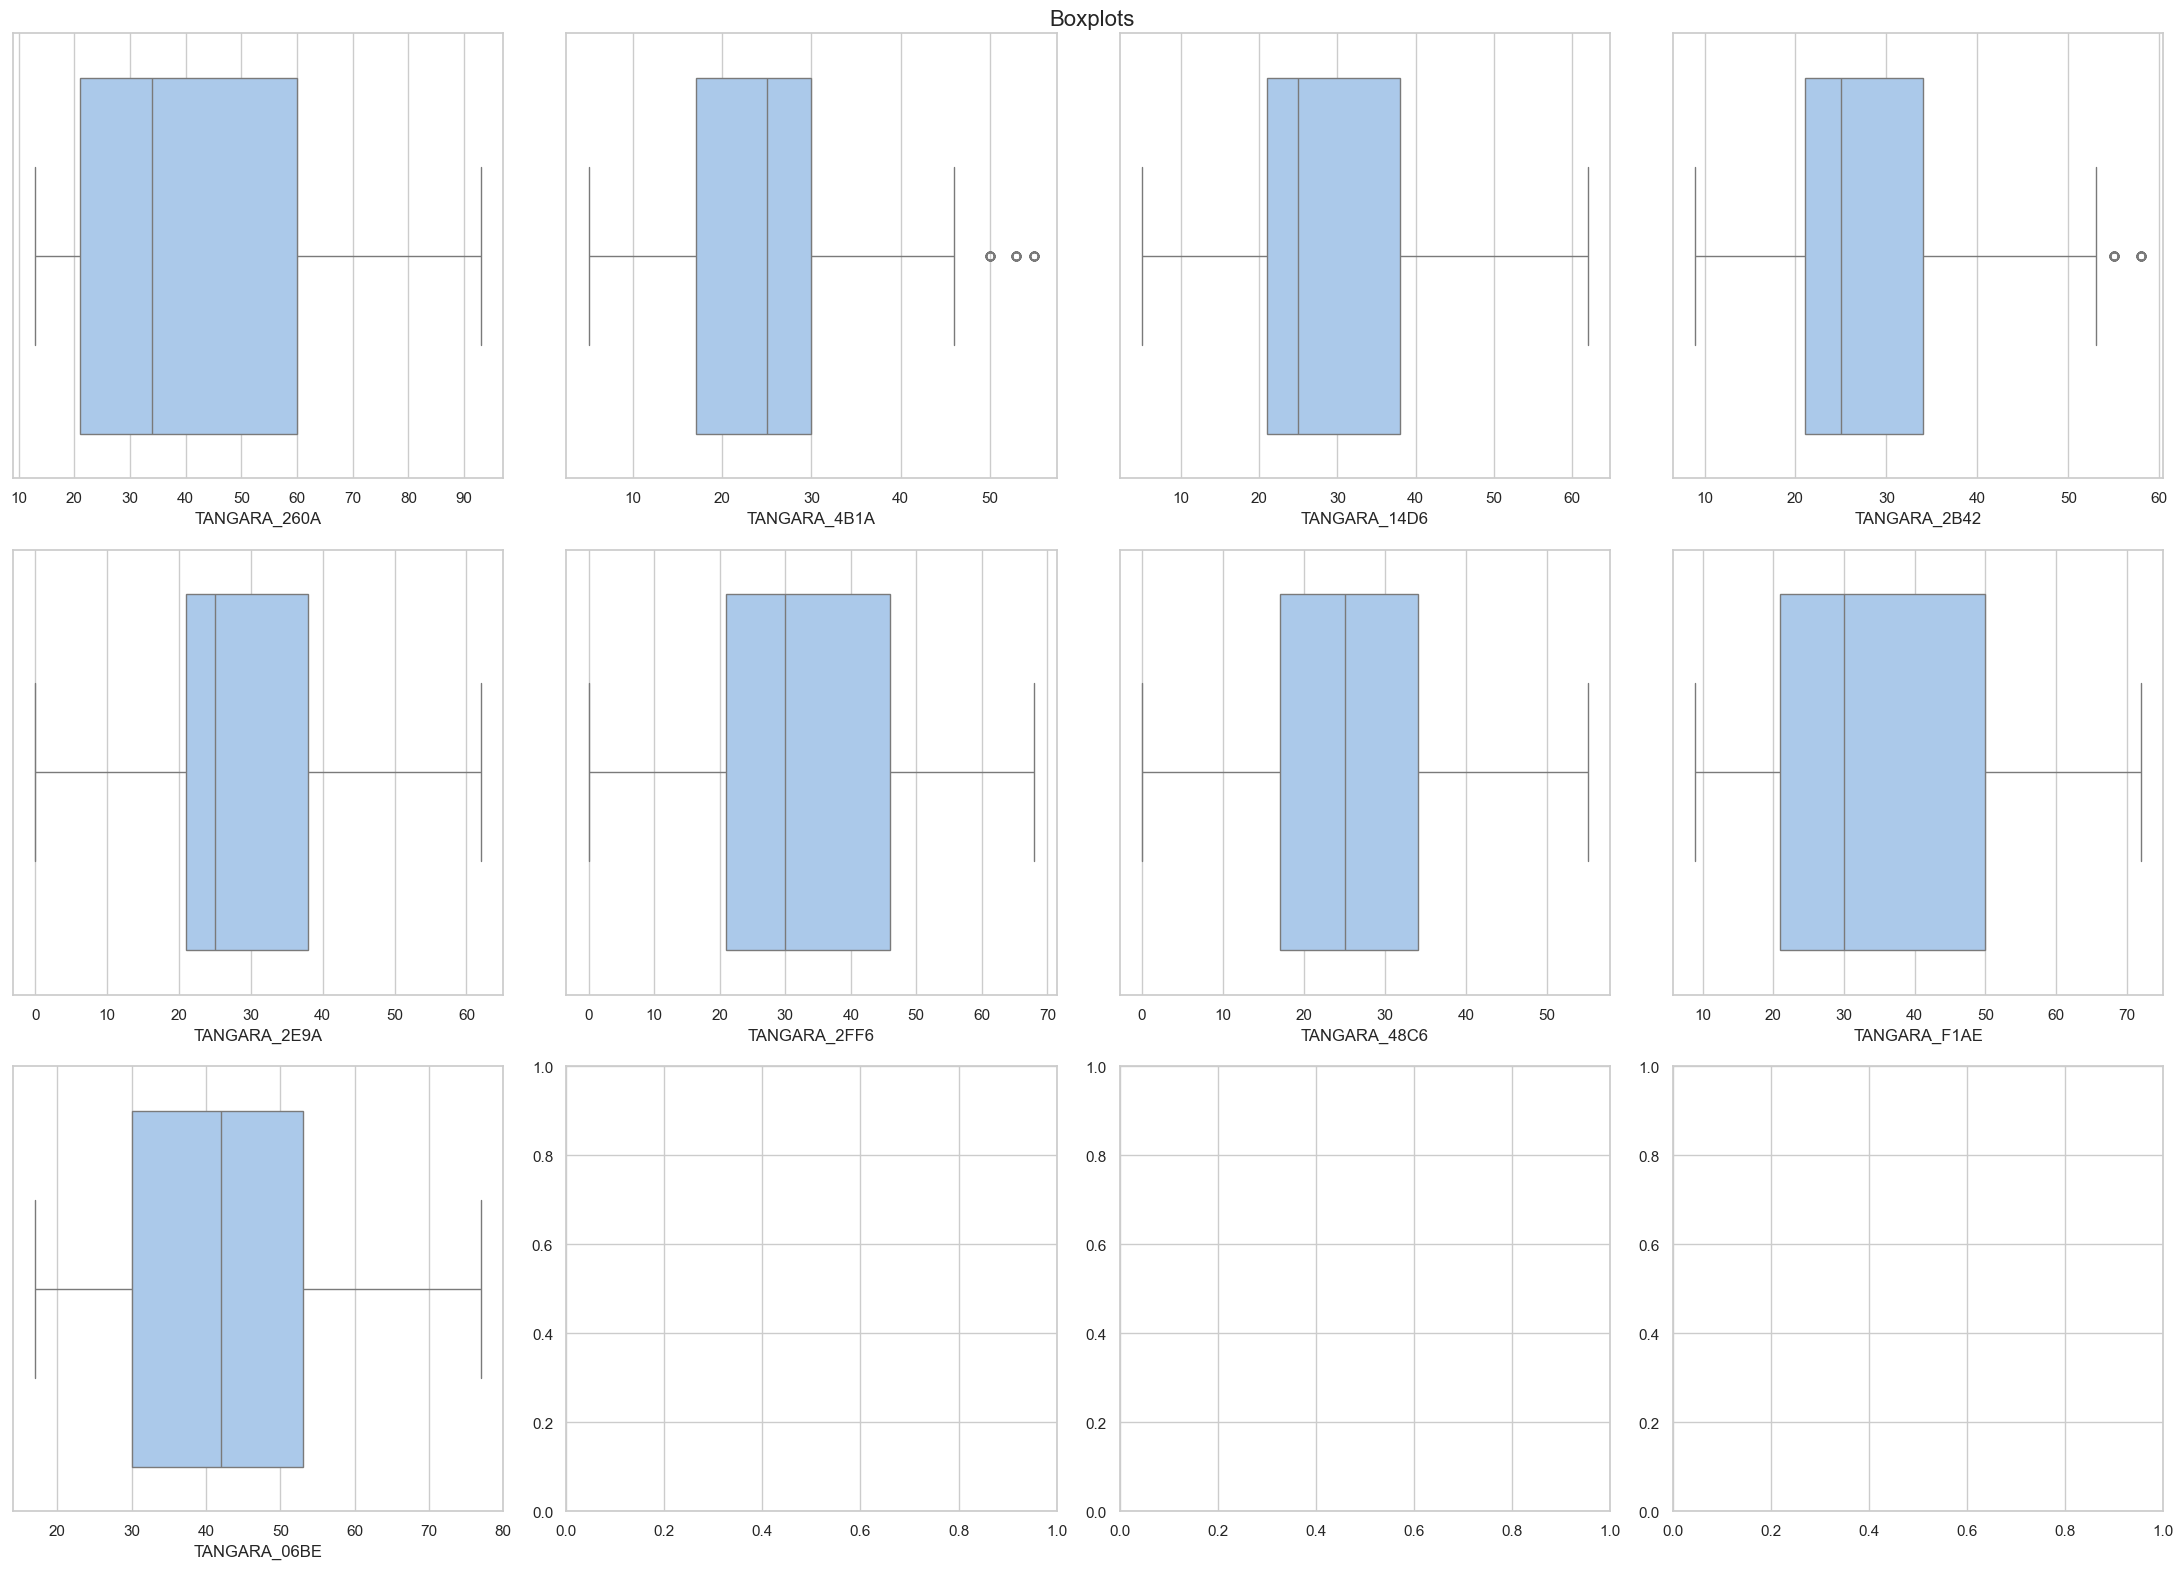

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

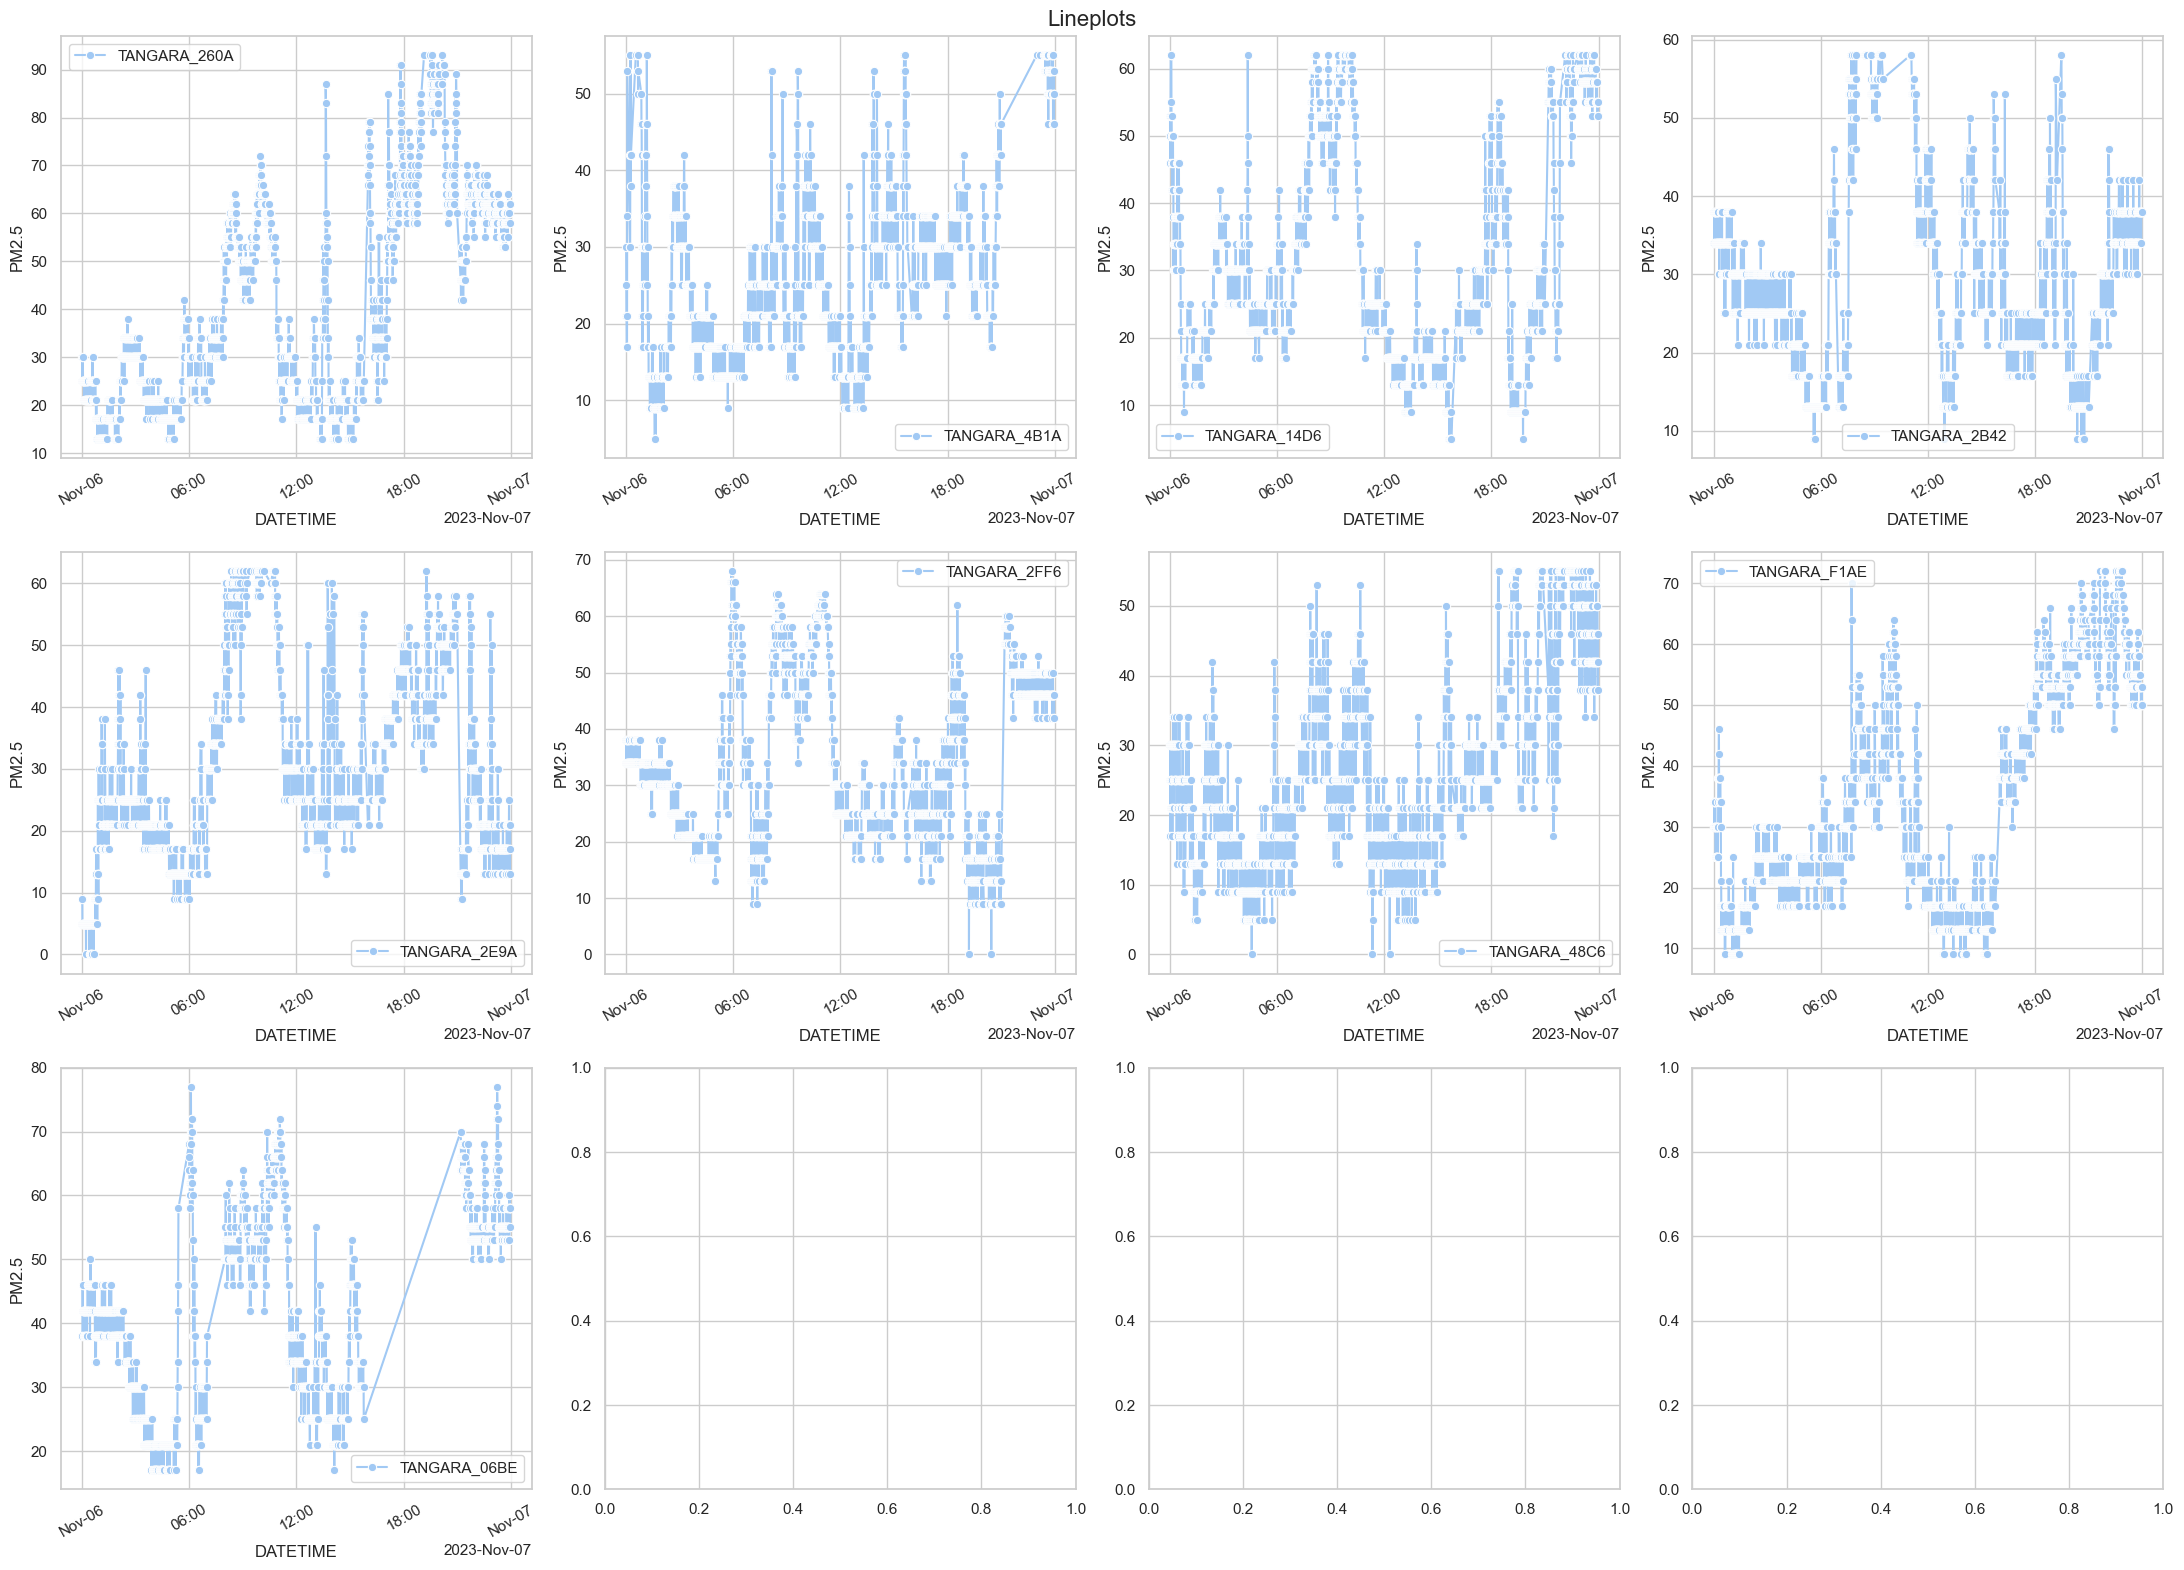

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')